In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Gerekli kütüphanalerin yüklenmesi:
Pandas- Veri okuma, düzenleme, analiz işlemleri için
Numpy- Sayısal işlemler, ve diziler için
Matplotlib- Grafik oluşturma için
Seaborn- İstatistiksel veri görselleştirmeleri için

In [2]:
p1titanic= pd.read_csv("train.csv")
p1titanic.head(10)

FileNotFoundError: [Errno 2] No such file or directory: 'train.csv'

Veri setini yüklüyoruz
Sütunlara bakıp içeriği inceleyebiliyoruz

In [ ]:
p1titanic = p1titanic.rename(columns={
    "PassengerId": "yolcu_id",
    "Survived": "hayatta_kaldi",
    "Pclass": "sinif",
    "Name": "isim",
    "Sex": "cinsiyet",
    "Age": "yas",
    "SibSp": "kardes_es_sayisi",
    "Parch": "ebeveyn_cocuk_sayisi",
    "Ticket": "bilet_no",
    "Fare": "ucret",
    "Cabin": "kabin",
    "Embarked": "liman"
})

Sütun isimlerini Türkçe'ye çevirdik

In [ ]:
p1titanic.head()

,yolcu_id,hayatta_kaldi,sinif,isim,cinsiyet,yas,kardes_es_sayisi,ebeveyn_cocuk_sayisi,bilet_no,ucret,kabin,liman
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Veri setinin yeni haline baktık .head() ile

In [ ]:
p1titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   yolcu_id              891 non-null    int64  
 1   hayatta_kaldi         891 non-null    int64  
 2   sinif                 891 non-null    int64  
 3   isim                  891 non-null    object 
 4   cinsiyet              891 non-null    object 
 5   yas                   714 non-null    float64
 6   kardes_es_sayisi      891 non-null    int64  
 7   ebeveyn_cocuk_sayisi  891 non-null    int64  
 8   bilet_no              891 non-null    object 
 9   ucret                 891 non-null    float64
 10  kabin                 204 non-null    object 
 11  liman                 889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


İstatiki bilgilere bakabiliyoruz .info() ile. Kaç satır, sütun, eksik değerler var bunları görebiliyoruz

In [ ]:
p1titanic.isnull().sum()

yolcu_id                  0
hayatta_kaldi             0
sinif                     0
isim                      0
cinsiyet                  0
yas                     177
kardes_es_sayisi          0
ebeveyn_cocuk_sayisi      0
bilet_no                  0
ucret                     0
kabin                   687
liman                     2
dtype: int64

Eksik verilerin toplam sayısını bu şekilde görebiliyoruz.

In [ ]:
p1titanic["yas"] = p1titanic["yas"].fillna(p1titanic["yas"].median())
p1titanic["liman"] = p1titanic["liman"].fillna(p1titanic["liman"].mode()[0])
p1titanic["kabin_var"] = p1titanic["kabin"].notnull().astype(int)
p1titanic.drop("kabin", axis=1, inplace=True)

Burada eksik verileri dolduruyoruz:
yas sütunundaki kısımları median (ortanca) ile doldurduk
yas sütunundaki kısımları mode (en sık geçen) ile doldurduk
kabin sütununda çok fazla eksik veri olduğundan sadece var mı yok mu bunu öğrenmek için yeni bir sütun oluşturduk kabin_var
kabin sütunu veri kirliliği yapmasın diye sildik

In [ ]:
p1titanic.isnull().sum()

yolcu_id                0
hayatta_kaldi           0
sinif                   0
isim                    0
cinsiyet                0
yas                     0
kardes_es_sayisi        0
ebeveyn_cocuk_sayisi    0
bilet_no                0
ucret                   0
liman                   0
kabin_var               0
dtype: int64

Eksik veri kaldı mı diye kontrol ettik veee yok

In [ ]:
p1titanic["aile_buyuklugu"] = (
    p1titanic["kardes_es_sayisi"] + 
    p1titanic["ebeveyn_cocuk_sayisi"] + 
    1
)

p1titanic["unvan"] = p1titanic["isim"].apply(lambda x: x.split(",")[1].split(".")[0].strip())

p1titanic["yalniz_mi"] = (p1titanic["aile_buyuklugu"] == 1).astype(int)

Hayatta kalma oranını etkileyebileceğini düşündüğüm özellikleri ayrıca sütun olarak oluşturduk:
"aile_buyuklugu",
"unvan" eğer,
"yalniz_mi" eğer yalnızsa yardım edeni olmayacağı için ölme ihtimali yüksektir. Orman kanunları...


In [ ]:
p1titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   yolcu_id              891 non-null    int64  
 1   hayatta_kaldi         891 non-null    int64  
 2   sinif                 891 non-null    int64  
 3   isim                  891 non-null    object 
 4   cinsiyet              891 non-null    object 
 5   yas                   891 non-null    float64
 6   kardes_es_sayisi      891 non-null    int64  
 7   ebeveyn_cocuk_sayisi  891 non-null    int64  
 8   bilet_no              891 non-null    object 
 9   ucret                 891 non-null    float64
 10  liman                 891 non-null    object 
 11  kabin_var             891 non-null    int64  
 12  aile_buyuklugu        891 non-null    int64  
 13  unvan                 891 non-null    object 
 14  yalniz_mi             891 non-null    int64  
dtypes: float64(2), int64(8)

Sütunlarımızın son halini .info() ile gördük

GÖRSELLEŞTİRME AŞAMASI

/var/folders/90/78252d3n5lsfth5ltb8c0dmw0000gn/T/ipykernel_46854/2352857000.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


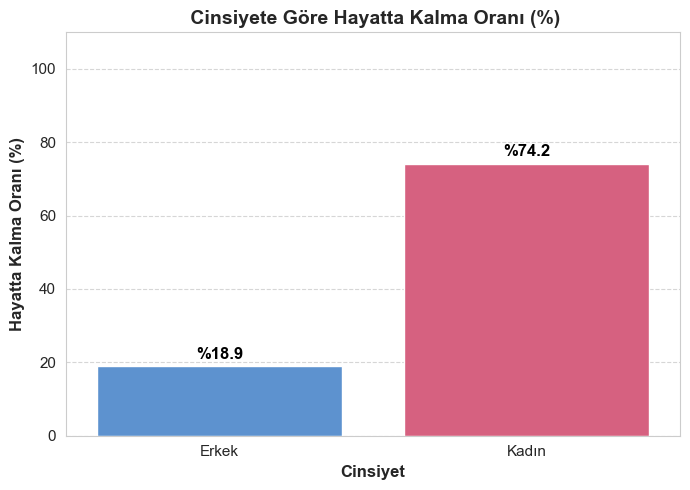

In [ ]:
p1titanic["cinsiyet"] = p1titanic["cinsiyet"].map({"female": "Kadın", "male": "Erkek"}) #cinsiyet değerini türkçe'ye çevirdik

oranlar = p1titanic.groupby("cinsiyet")["hayatta_kaldi"].mean().reset_index()
oranlar["yuzde"] = oranlar["hayatta_kaldi"] * 100

sns.set_style("whitegrid")
plt.figure(figsize=(7,5))
renkler = ["#4a90e2", "#e94e77"]  # renk tonları
barplot = sns.barplot(
    data=oranlar,
    x="cinsiyet",
    y="yuzde",
    palette=renkler
)

#bar üstünde yüzdelik oran yazılması
for index, row in oranlar.iterrows():
    barplot.text(index, row["yuzde"] + 2, f"%{row['yuzde']:.1f}", 
                 color='black', ha="center", fontsize=12, fontweight='bold')


plt.title(" Cinsiyete Göre Hayatta Kalma Oranı (%)", fontsize=14, fontweight="bold")
plt.xlabel("Cinsiyet", fontsize=12, fontweight="bold")
plt.ylabel("Hayatta Kalma Oranı (%)", fontsize=12, fontweight="bold")
plt.ylim(0, 110)
plt.grid(axis='y', linestyle='--', alpha=0.8)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.tight_layout()
plt.show()

Her cinsiyetin hayatta kalma oranını yüzdelik olarak hesapladık ve grafiği klasik grafiklere nazaran daha da özelleştirerek oluşturduk.

Kadınlar arasında hayatta kalma oranı → 233 / 314 = %74.2
Erkekler arasında hayatta kalma oranı → 109 / 577 = %18.9

/var/folders/90/78252d3n5lsfth5ltb8c0dmw0000gn/T/ipykernel_46854/243633513.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  p1titanic
/var/folders/90/78252d3n5lsfth5ltb8c0dmw0000gn/T/ipykernel_46854/243633513.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


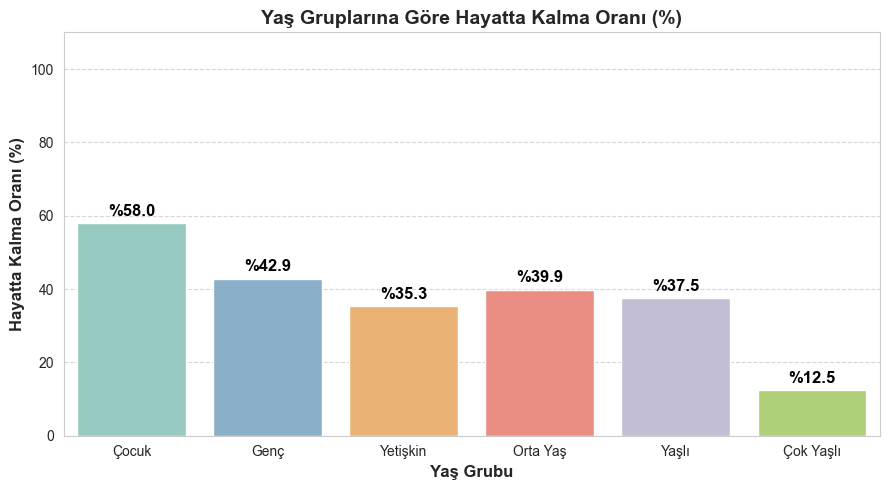

In [ ]:
bins = [0, 12, 18, 35, 50, 65, 100]
labels = ['Çocuk', 'Genç', 'Yetişkin', 'Orta Yaş', 'Yaşlı', 'Çok Yaşlı']

p1titanic["yas_grubu"] = pd.cut(p1titanic["yas"], bins=bins, labels=labels)

sns.set_style("whitegrid")
plt.figure(figsize=(9,5))

yas_oran = (
    p1titanic
    .groupby("yas_grubu")["hayatta_kaldi"]
    .mean()
    .reset_index()
)
yas_oran["yuzde"] = yas_oran["hayatta_kaldi"] * 100


renkler = ["#8dd3c7", "#80b1d3", "#fdb462", "#fb8072", "#bebada", "#b3de69"]
barplot = sns.barplot(
    data=yas_oran,
    x="yas_grubu",
    y="yuzde",
    palette=renkler
)


for index, row in yas_oran.iterrows():
    barplot.text(index, row["yuzde"] + 2, f"%{row['yuzde']:.1f}",
                 color='black', ha="center", fontsize=12, fontweight='bold')

plt.title("Yaş Gruplarına Göre Hayatta Kalma Oranı (%)", fontsize=14, fontweight="bold")
plt.xlabel("Yaş Grubu", fontsize=12, fontweight="bold")
plt.ylabel("Hayatta Kalma Oranı (%)", fontsize=12, fontweight="bold")
plt.ylim(0, 110)
plt.grid(axis='y', linestyle='--', alpha=0.8)
plt.tight_layout()
plt.show()

Yaşları gruplara ayırıp bu gruplara göre hayatta kalma oranını yüzdesel olarak hesapladık ve grafiğe dökdük.

/var/folders/90/78252d3n5lsfth5ltb8c0dmw0000gn/T/ipykernel_46854/2473276485.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


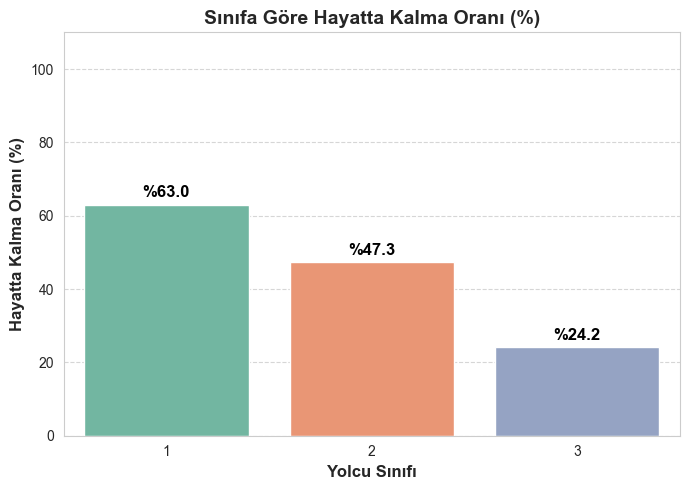

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(7,5))

sinif_oran = (
    p1titanic
    .groupby("sinif")["hayatta_kaldi"]
    .mean()
    .reset_index()
)
sinif_oran["yuzde"] = sinif_oran["hayatta_kaldi"] * 100


renkler = ["#66c2a5", "#fc8d62", "#8da0cb"]
barplot = sns.barplot(
    data=sinif_oran,
    x="sinif",
    y="yuzde",
    palette=renkler
)


for index, row in sinif_oran.iterrows():
    barplot.text(index, row["yuzde"] + 2, f"%{row['yuzde']:.1f}",
                 color='black', ha="center", fontsize=12, fontweight='bold')


plt.title("Sınıfa Göre Hayatta Kalma Oranı (%)", fontsize=14, fontweight="bold")
plt.xlabel("Yolcu Sınıfı", fontsize=12, fontweight="bold")
plt.ylabel("Hayatta Kalma Oranı (%)", fontsize=12, fontweight="bold")
plt.ylim(0, 110)
plt.grid(axis='y', linestyle='--', alpha=0.8)
plt.tight_layout()
plt.show()

Sınıflara göre yolcuların hayatta kalma oranlarını karşılaştırdık. Sınıf arttıkça hayatta kalma oranı artıyormuş.

- 1 → Birinci sınıf
- 2 → İkinci sınıf
- 3 → Üçüncü sınıf

/var/folders/90/78252d3n5lsfth5ltb8c0dmw0000gn/T/ipykernel_46854/4007228958.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


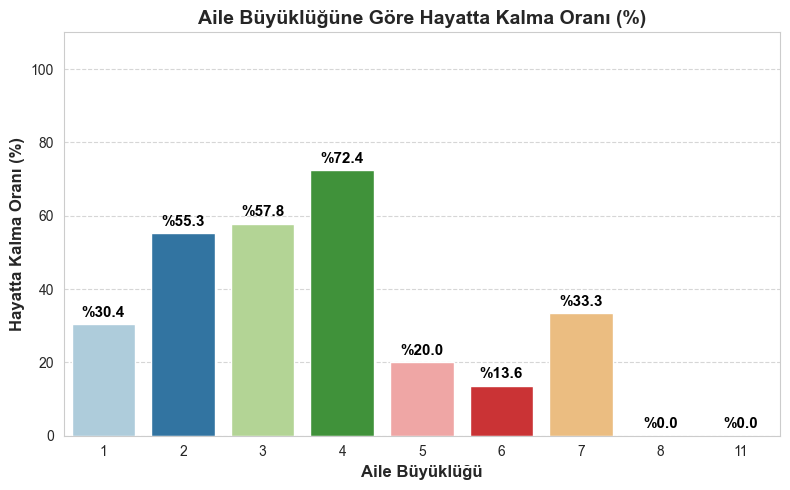

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(8,5))

aile_oran = (
    p1titanic
    .groupby("aile_buyuklugu")["hayatta_kaldi"]
    .mean()
    .reset_index()
)
aile_oran["yuzde"] = aile_oran["hayatta_kaldi"] * 100


renkler = sns.color_palette("Paired", n_colors=len(aile_oran))
barplot = sns.barplot(
    data=aile_oran,
    x="aile_buyuklugu",
    y="yuzde",
    palette=renkler
)


for index, row in aile_oran.iterrows():
    barplot.text(index, row["yuzde"] + 2, f"%{row['yuzde']:.1f}",
                 color='black', ha="center", fontsize=11, fontweight='bold')


plt.title("Aile Büyüklüğüne Göre Hayatta Kalma Oranı (%)", fontsize=14, fontweight="bold")
plt.xlabel("Aile Büyüklüğü", fontsize=12, fontweight="bold")
plt.ylabel("Hayatta Kalma Oranı (%)", fontsize=12, fontweight="bold")
plt.ylim(0, 110)
plt.grid(axis='y', linestyle='--', alpha=0.8)
plt.tight_layout()
plt.show()

Aile büyüklüğü arttıkça hayatta kalma oranı nasıl değişiyor onu grafikle analiz ettik:

-- Yalnız seyahat eden yolcuların hayatta kalma oranı düşüktür,
-- 2-4 kişilik küçük aileler daha avantajlı görünmektedir,
-- Çok kalabalık ailelerde (5 kişi ve üzeri) hayatta kalma oranı tekrar düşmektedir,

In [ ]:
unvan_sayilari = p1titanic["unvan"].value_counts()
sik_unvanlar = unvan_sayilari[unvan_sayilari > 10].index

Veri setinde en çok geçen unvanları saydık 

In [ ]:
unvan_sayilari

unvan
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: count, dtype: int64

/var/folders/90/78252d3n5lsfth5ltb8c0dmw0000gn/T/ipykernel_46854/1539726601.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


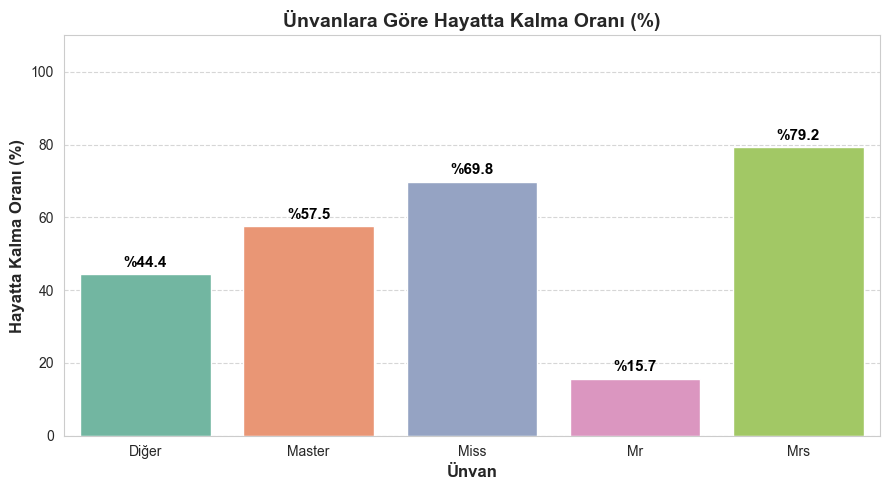

In [ ]:

p1titanic["unvan_grup"] = p1titanic["unvan"].apply(lambda x: x if x in sik_unvanlar else "Diğer")

unvan_oran = (
    p1titanic
    .groupby("unvan_grup")["hayatta_kaldi"]
    .mean()
    .reset_index()
)
unvan_oran["yuzde"] = unvan_oran["hayatta_kaldi"] * 100


renkler = sns.color_palette("Set2", n_colors=len(unvan_oran))
plt.figure(figsize=(9,5))
barplot = sns.barplot(
    data=unvan_oran,
    x="unvan_grup",
    y="yuzde",
    palette=renkler
)


for index, row in unvan_oran.iterrows():
    barplot.text(index, row["yuzde"] + 2, f"%{row['yuzde']:.1f}",
                 color='black', ha="center", fontsize=11, fontweight='bold')

plt.title("Ünvanlara Göre Hayatta Kalma Oranı (%)", fontsize=14, fontweight="bold")
plt.xlabel("Ünvan", fontsize=12,fontweight="bold")
plt.ylabel("Hayatta Kalma Oranı (%)", fontsize=12, fontweight="bold")
plt.ylim(0, 110)
plt.grid(axis='y', linestyle='--', alpha=0.8)
plt.tight_layout()
plt.show()

Ünvan gruplarına göre hayatta kalma oranına baktık:

-- Miss/Mrs gibi kadın unvanına sahip yolcuların hayatta kalma oranı yüksek. Bu da kadınlara tahliyede öncelik verildiğini gösteriyor.
-- Mr unvanlı erkek yolcuların oranı ise belirgin şekilde düşük. Önceliğin kadın ve çocuklara verilmesinden dolayı olabilir.
-- Dr, Col, Rev gibi özel unvanlar daha değişken sonuçlar veriyor. Bazıları üst sınıf olduğu için avantajlı olabilir; ama çoğu yetişkin erkek olduğu için oran yine düşük kalmış olabilir.

MODELLEME AŞAMASI

In [ ]:
kullanilacak_sutunlar = [
    'sinif', 'cinsiyet', 'yas', 'ucret', 'liman', 
    'aile_buyuklugu', 'unvan', 'yalniz_mi'
    ]

#onehot encode
veri_model = pd.get_dummies(p1titanic[kullanilacak_sutunlar], drop_first=True)
etiket = p1titanic["hayatta_kaldi"]

Model için kullanılacak sütunları belirledik ve kategorik verileri sayılara çevirmek için onehot encoding kullandık.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    veri_model, etiket, test_size=0.2, random_state=42
)

Veriyi eğitim ve test olmak üzere ikiye ayırdık. %80 eğitim, %20 test olacak şekilde ayırma yaptık. Böylece modelimizi test etmek için elimizde ayrı bir veri kaldı.

Veriyi eğitim ve test olarak ikiye ayırdık. %20 test %80 eğitim verisi olarak girdimizi girdik (0.20). 

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Model eğitilmiş durumda

In [ ]:
tahminler = model.predict(X_test)

Modeli test verisi üstünde çalıştırdık ve "tahminler" adlı değişkene atadık

In [ ]:
from sklearn.metrics import accuracy_score

dogruluk = accuracy_score(y_test, tahminler)
print(f"Model Doğruluğu: %{dogruluk * 100:.2f}")

Model Doğruluğu: %84.36


%80'in üzerindeki oranlar sağlıklıdır ama tek başına yeterli değildir.

----------------

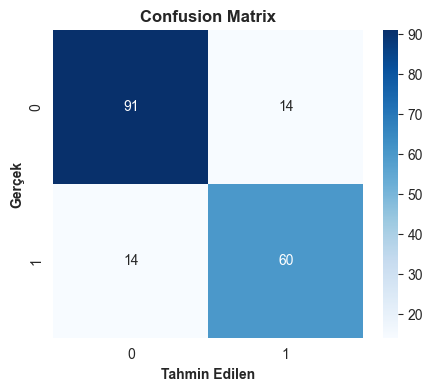

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, tahminler)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix", fontweight="bold")
plt.xlabel("Tahmin Edilen", fontweight="bold")
plt.ylabel("Gerçek", fontweight="bold")
plt.show()

Confusion matrix ile hangi tahminlerin doğru, hangilerinin yanlış olduğunu net olarak görüyoruz:

-- 91 kişi gerçekten ölmüş ve model bunları doğru tahmin etmiş (True Negative)
-- 60 kişi gerçekten hayatta kalmış ve model bunu da doğru tahmin etmiş (True Positive)
-- 14 kişiyi model yanlışlıkla ölmüş diye tahmin etmiş (False Negative)
-- 14 kişiyi de yanlışlıkla hayatta kalmış olarak tahmin etmiş (False Positive)

151 kişilik test verisinde 28 hata yapılmış ve model dengeli sayılır %84

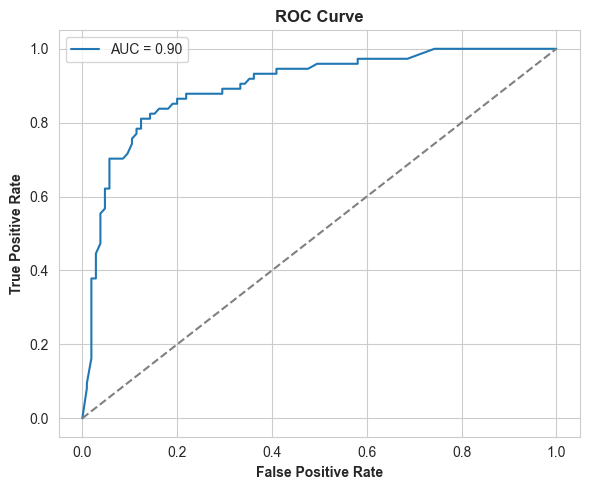

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve

y_olasilik = model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_olasilik)

fpr, tpr, threshold = roc_curve(y_test, y_olasilik)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate', fontweight="bold")
plt.ylabel('True Positive Rate', fontweight="bold")
plt.title('ROC Curve', fontweight="bold")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

ROC eğrisi, modelin farklı eşik değerlerinde ne kadar iyi performans gösterdiğini ölçmek için kullanılır. Eğri ne kadar sol üst köşeye yakınsa, model o kadar başarılıdır. AUC skoru 1'e ne kadar yakınsa o kadar iyidir. 

AUC skoru 0.90'dır ve bu model başarısının güçlü olduğunu gösterir. Hem ölen hem hayatta kalanlar yüksek oranda doğru şekilde ayırt edilmiştir.
